# Data

* [Amazon Top 50 Bestselling Books 2009 - 2019](https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019)

Dataset on Amazon's Top 50 bestselling books from 2009 to 2019, containing 550 books. Data has been categorized into fiction and non-fiction using Goodreads.

**Objectives**

1. Author with more books [:15]
2. Amount of books per author 
3. Top genre (con mayores libros)
4. Fix rating using reference
5. most expensive books
6. Most valuable book (price, user rating
7. most successful

In [ ]:
# Linear algebra
import numpy as np  

# Text and data manipulation
import chardet  # character encoding
import pandas as pd  # data processing

# Data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import geopandas as gpd  # Geospatial visualization
import missingno  # Missing data visualization
import seaborn as sns  # Data visualization
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
books = pd.read_csv('/kaggle/input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv')
books

In [ ]:
books.info()

In [ ]:
dupl = books.duplicated()
books[dupl].shape

In [ ]:
missingno.matrix(books, figsize=(35,7), color=(0.25, 0.3, 0.34), fontsize=35)

The dataset contains no-null objects

In [ ]:
def unique_val(column, data):
    unique_values = data[column].unique()
    return unique_values

In [ ]:
books['Author'].value_counts()

In [ ]:
books['Author'].value_counts(normalize=True)[:15]

In [ ]:
books['Author'].value_counts().describe()

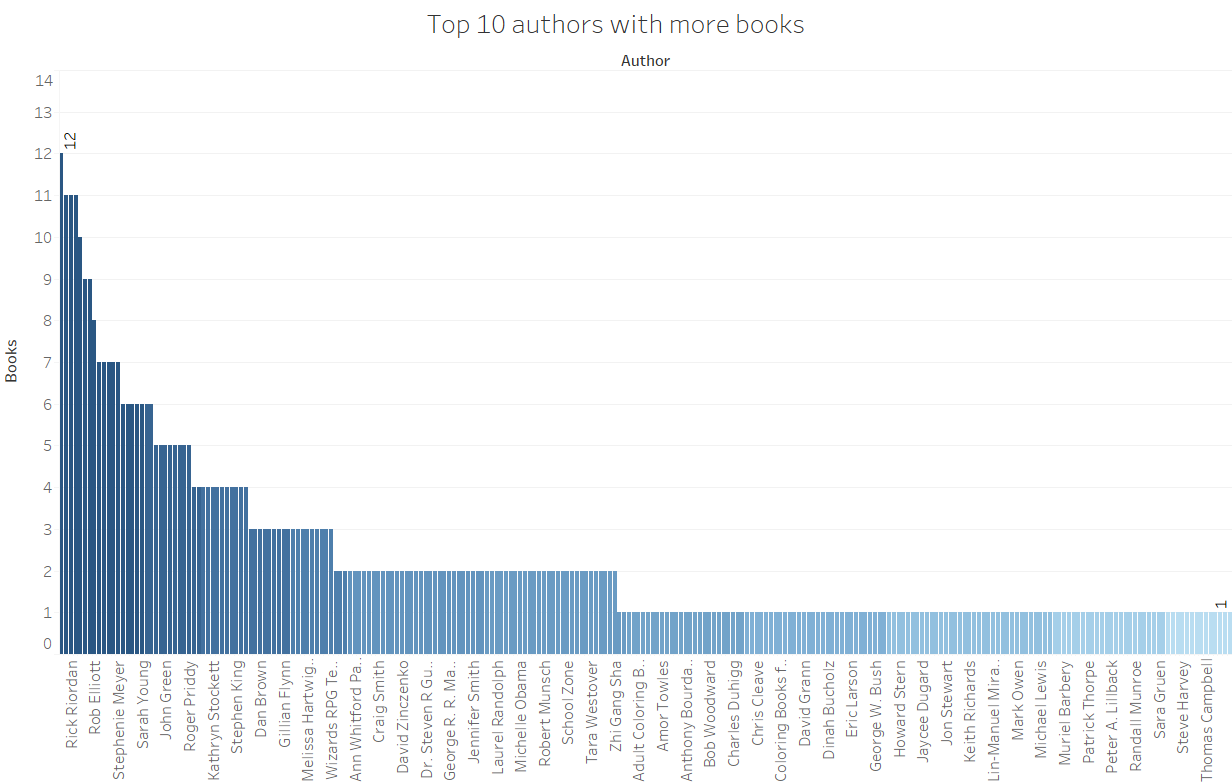

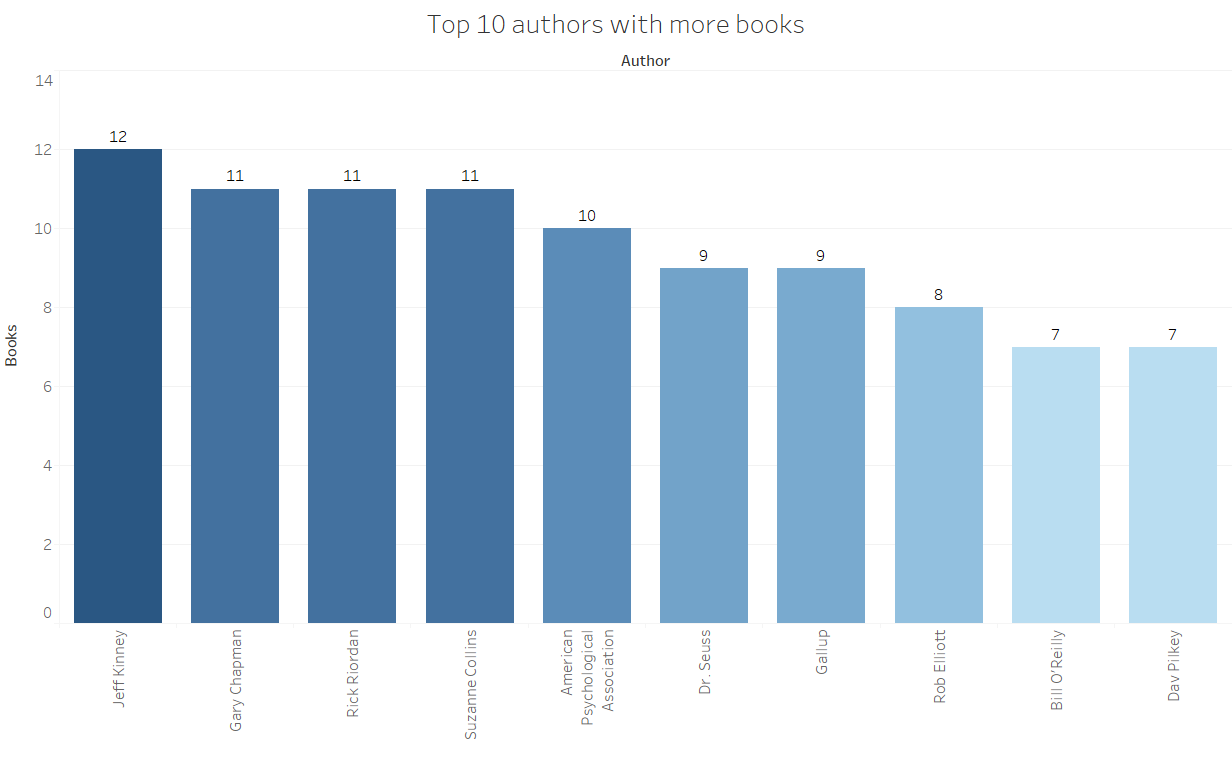

Visualization with Python

In [ ]:
plt.figure(figsize=(40,10))
plt.title("Quantity of books per author", fontsize=25)
sns.barplot(x=books['Author'].value_counts().index, y=books['Author'].value_counts(), palette="Blues_d")
plt.ylabel("Quantity of books", fontsize=25)
plt.xlabel("Author", fontsize=25)
plt.xticks(rotation=90)

books['Author'].value_counts().value_counts()

In [ ]:
plt.figure(figsize=(40,10))
plt.title("Top 10")
sns.barplot(x=books['Author'].value_counts().index[:10], y=books['Author'].value_counts()[:10], palette="Blues_d")
plt.ylabel("Quantity of books", fontsize=30)
plt.xlabel("Author",fontsize=30)
plt.xticks(rotation=90, fontsize=25)

**Authors**

In [ ]:
books['Author'].value_counts().value_counts()

In [ ]:
label = []

for num_books in books['Author'].value_counts().value_counts():
    label.append(num_books)

fig, ax = plt.subplots(figsize=(19, 5))
rects1 = plt.bar(books['Author'].value_counts().value_counts().index, books['Author'].value_counts().value_counts(), alpha=0.8, color='slategrey')

plt.xlabel('Quantity of books', fontsize=15)
plt.ylabel('Quantity of authors', fontsize=15)
plt.title('Quantity of authors per book', fontsize=20)
plt.xticks(books['Author'].value_counts().value_counts().index, fontsize=20)
sns.set(font_scale=1)
rects1[0].set_color('darkslategray')

def tagger(rects):
    for ii,rect in enumerate(rects):
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2., 0.99*height, '%s'% (label[ii]),
                ha='center', va='baseline', fontsize='large', fontweight='semibold')
        
        
tagger(rects1)

# (Cosmosis, 2011) 

books['Author'].value_counts().value_counts(normalize=True)

130 authors have 1 book and 60 authors have 2 books in the list, accounting for 52.4% and 24% of the total authors, respectively.

In [ ]:
author_rating = books.groupby('Author')[['Name', 'Reviews', 'User Rating']].max()
author_rating

In [ ]:
plt.xlabel('Amount of reviews')
plt.ylabel('Frequency')
plt.hist(books['Reviews'], color='slategray')

books['Reviews'].value_counts()

In [ ]:
books['Reviews'].describe()

Most of the books have less than 12,000 reviews

In [ ]:
books['Year'].value_counts()

Due the fact that the dataset does not contain an efective method for validate the reviews and user rating. Saalu (2020) propose a new method, using weighted rating, which takes into consideration the average rating of books and the number of reviews.



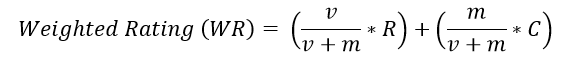

(Saalu, 2020)

Where:
* R = average rating of books, 
* v = number of reviews of the book,
* m = minimum reviews required to be listed in the best seller list, and
* C = the mean rating in the dataset.

In [ ]:
def weighted_rating(df):
    v = df['Reviews']
    R = df['User Rating']
    m = books['Reviews'].min()
    C = books['User Rating'].mean()
    return (v/(v+m)*R) + (m/(v+m)*C)

books['Weighted Rating'] = books.apply(weighted_rating, axis=1)

books.head()

In [ ]:
books.groupby(['Name', 'Author', 'Price', 'Year', 'Genre'], as_index=False)[['User Rating', 'Reviews', 'Weighted Rating']].mean().sort_values(
    by='Weighted Rating', ascending=False).head(20)

The dataset does not record annual review increments, because of this "Oh, the Places You'll Go!" has the same reviews in all years of registration.

In [ ]:
final_rated = books.groupby(['Name', 'Author', 'Genre'], as_index=False)[['User Rating', 'Reviews', 'Weighted Rating']].mean().sort_values(by=
'Weighted Rating', ascending=False)
final_rated

books.to_csv('top10authors.csv', index=False)

In [ ]:
final_rated_author = final_rated['Author']
final_rated_ratings = final_rated['Weighted Rating']
#final_rated_ratings.iloc[0]
comb_aut_name = final_rated[['Author', 'Name']].agg(' - '.join, axis=1)

Dataframe for Tableau visualizations

In [ ]:
df = pd.DataFrame({'Author/Book': comb_aut_name, 'Weighted Rating': final_rated_ratings})
df.to_csv('books_rated.csv', index=False)

df

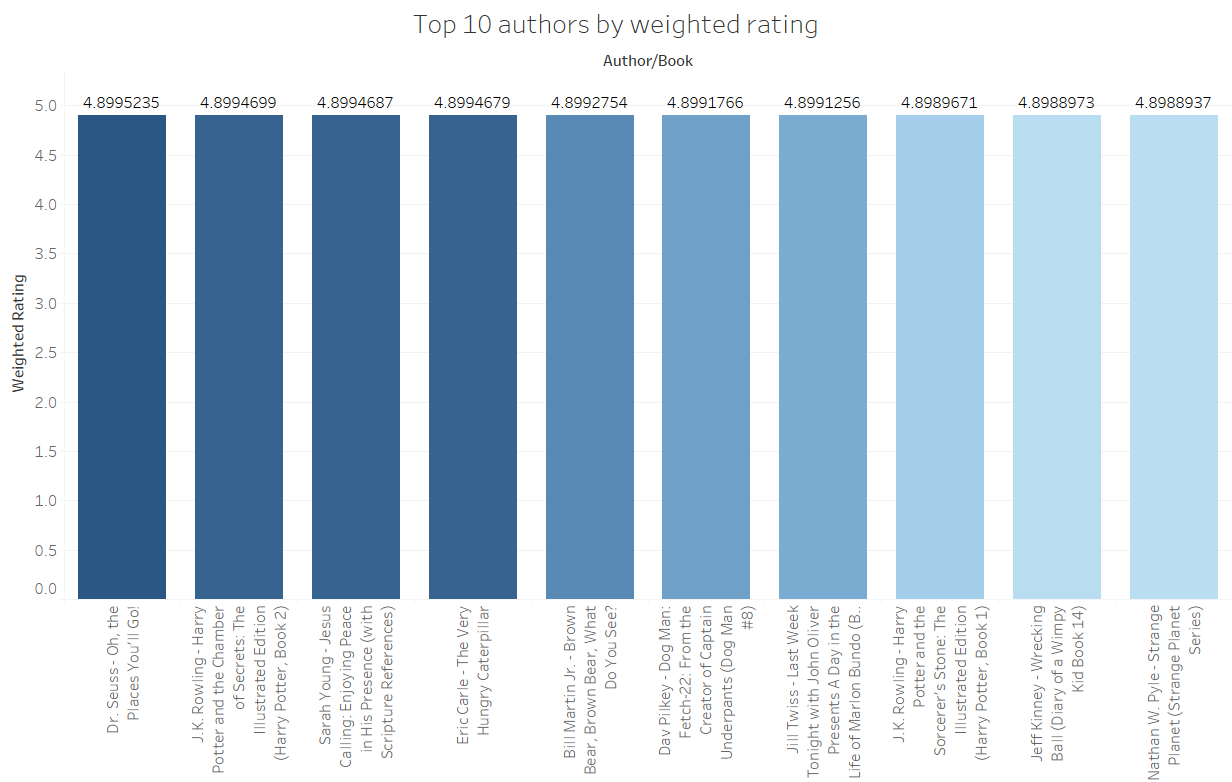

In [ ]:
books_rated = books.groupby(['Author', 'Name'], as_index='Author')[['Weighted Rating', 'Reviews']].mean().sort_values(by='Weighted Rating', ascending=False)
books_rated

Python visualization

In [ ]:
label_rating = []

for rating_book in final_rated_ratings:
    label_rating.append(rating_book)

fig, ax = plt.subplots(figsize=(19, 5))
bar_width = 0.95
opacity = 0.4
plt.xlabel('Author/Book', fontsize=15)
plt.ylabel('Average weighted rating', fontsize=15)
plt.title('Top 10 average weighted rating', fontsize=20)
plt.xticks(rotation=90, fontsize=15)

rect_rating = plt.bar(comb_aut_name[:10], final_rated_ratings[:10],bar_width, color = 'slategrey', alpha = 0.80)
rect_rating[0].set_color('darkslategrey')

def autolabel(rects):
    for ii,rect in enumerate(rects):
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2., 0.9*height, '%s'% (round(label_rating[ii], 4)), ha='center', va='baseline', fontsize='large', 
                 fontweight='semibold')
        
        
autolabel(rect_rating)

In [ ]:
books_rated = books.groupby(['Author'], as_index='Author')[['Weighted Rating']].mean().sort_values(by='Weighted Rating', ascending=False).head(20)
books_rated[:10]

In [ ]:
plt.hist(books['Price'], color='slategrey')
plt.xlabel('Price')

books['Price'].describe()

The most expensive book is Diagnostic and Statistical Manual of Mental Disorders, 5th Edition: DSM-5, written by American Psychiatric Association. On the other hand, we got 12 books with the minimum price. The average price is $13. 

In [ ]:
books['Price'].value_counts()

In [ ]:
books_value = books.groupby(['Author', 'Name'], as_index='Author')[['Weighted Rating', 'Reviews', 'Price']].mean().sort_values(by='Price', ascending=False)
books_value

Most of the books prices are under $20

In [ ]:
final_rated = books.groupby(['Name', 'Author', 'Genre'], as_index=False)[['User Rating', 'Reviews', 'Weighted Rating']].mean().sort_values(by=
'Weighted Rating', ascending=False).head(20)
final_rated

In [ ]:
books['Genre'].value_counts(normalize=True)

In [ ]:
genre_rating = books.groupby(['Author', 'Name', 'Reviews', 'Genre', 'Year'], as_index=False)[['Weighted Rating']].mean().sort_values(by='Weighted Rating', ascending=False)

genre_rating.head(20)

In [ ]:
genre_date = genre_rating[genre_rating['Name'] == "Oh, the Places You'll Go!"]
genre_date

In [ ]:
books['Name'].value_counts()

**REFERENCES**

* (Saalu, 2020): https://www.kaggle.com/sootersaalu
* https://stackoverflow.com/questions/7423445/how-can-i-display-text-over-columns-in-a-bar-chart-in-matplotlib